In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adadelta, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
# from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
# from keras.utils import np_utils
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as np_utils
import matplotlib.pyplot as plt

2024-06-13 13:57:27.856675: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 13:57:27.905145: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 13:57:28.077087: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 13:57:28.077128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 13:57:28.105131: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
corpus = pd.read_csv('processed_reviews.csv')

In [4]:
labels = corpus['label'].values

In [5]:
X = corpus['Cleaned']

# Fill NaN values with an empty string in the 'Cleaned' column
X.fillna('', inplace=True)

# Tokenize the text
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad sequences
X = pad_sequences(X, maxlen=100)



In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42) 

In [7]:
y_train_cat = np_utils.to_categorical(y_train, 2)
y_test_cat = np_utils.to_categorical(y_test, 2)


In [8]:
from tensorflow.keras import layers

In [9]:
rnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=20000, output_dim=32, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

2024-06-13 13:57:52.000158: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-13 13:57:52.001219: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
rnn_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [12]:
history = rnn_model.fit(X_train, y_train_cat, epochs=10,
              validation_data=(X_test, y_test_cat),
              validation_steps=30)

Epoch 1/10
54/54 [==============================] - 7s 127ms/step - loss: 0.1676 - accuracy: 0.9387 - val_loss: 0.4731 - val_accuracy: 0.8415
Epoch 2/10
54/54 [==============================] - 6s 113ms/step - loss: 0.1377 - accuracy: 0.9551
Epoch 3/10
54/54 [==============================] - 6s 113ms/step - loss: 0.1240 - accuracy: 0.9557
Epoch 4/10
54/54 [==============================] - 6s 114ms/step - loss: 0.1045 - accuracy: 0.9638
Epoch 5/10
54/54 [==============================] - 6s 118ms/step - loss: 0.0918 - accuracy: 0.9679
Epoch 6/10
54/54 [==============================] - 6s 114ms/step - loss: 0.0827 - accuracy: 0.9755
Epoch 7/10
54/54 [==============================] - 6s 114ms/step - loss: 0.0775 - accuracy: 0.9737
Epoch 8/10
54/54 [==============================] - 6s 113ms/step - loss: 0.0711 - accuracy: 0.9772
Epoch 9/10
54/54 [==============================] - 6s 113ms/step - loss: 0.0719 - accuracy: 0.9778
Epoch 10/10
54/54 [==============================] - 6s 11

In [13]:
y_test_pred = rnn_model.predict(X_test)
y_test_predclass = np.argmax(y_test_pred, axis=1)
y_trian_pred = rnn_model.predict(X_train)
y_train_predclass = np.argmax(y_trian_pred, axis=1)

54/54 [==============================] - 2s 37ms/step


In [14]:


from sklearn.metrics import accuracy_score,classification_report
print ("nDeep Neural Network - Test accuracy:",(round(accuracy_score(y_test, y_test_predclass),4)*100))
print ("nDeep Neural Network - Train accuracy:",(round(accuracy_score(y_train, y_train_predclass),4)*100))



nDeep Neural Network - Test accuracy: 74.13
nDeep Neural Network - Train accuracy: 87.05000000000001


In [15]:


X_pred=tokenizer.texts_to_sequences(['شهرکرد جای خیلی خوبی است.'])
X_pred=pad_sequences(X_pred,maxlen=100)



In [16]:
rnn_model.predict(X_pred)

1/1 [==============================] - 0s 17ms/step


array([[0.0162483 , 0.98375165]], dtype=float32)

In [17]:
history_dict = history.history

In [18]:
history_dict

{'loss': [0.16762973368167877,
  0.1376696676015854,
  0.12403152883052826,
  0.10452032089233398,
  0.0918433889746666,
  0.08266272395849228,
  0.07749029248952866,
  0.0710749626159668,
  0.07194110751152039,
  0.06637567281723022],
 'accuracy': [0.9387397766113281,
  0.9550758600234985,
  0.9556592702865601,
  0.9638273119926453,
  0.9679113030433655,
  0.9754959344863892,
  0.9737456440925598,
  0.9772462248802185,
  0.97782963514328,
  0.9784130454063416],
 'val_loss': [0.4731157422065735],
 'val_accuracy': [0.8414918184280396]}

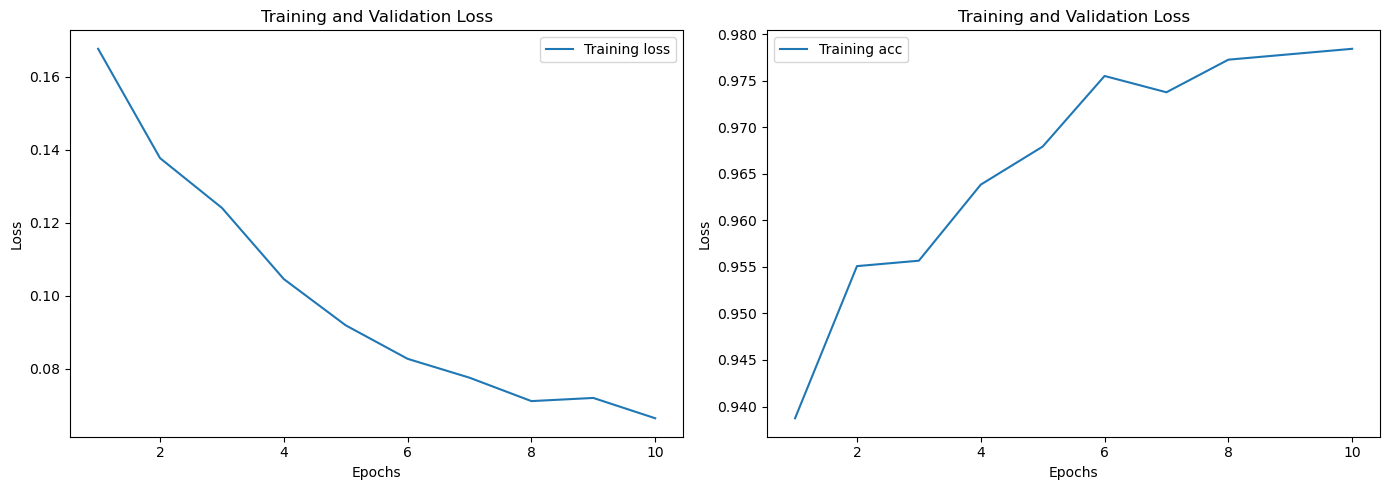

In [27]:
epochs = range(1, len(history_dict['loss']) + 1)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss, label = 'Training loss')
# plt.plot(epochs, val_loss, 'b', label = 'val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_acc, label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

